## Part 1

In [23]:
import pandas as pd

# Read data from files 
train = pd.read_csv( "labeledTrainData.tsv", header=0, 
 delimiter="\t", quoting=3 )
test = pd.read_csv( "testData.tsv", header=0, delimiter="\t", quoting=3 )
unlabeled_train = pd.read_csv( "unlabeledTrainData.tsv", header=0, 
 delimiter="\t", quoting=3 )

# Verify the number of reviews that were read (100,000 in total)
print "Read %d labeled train reviews, %d labeled test reviews, " \
 "and %d unlabeled reviews\n" % (train["review"].size,  
 test["review"].size, unlabeled_train["review"].size )

Read 25000 labeled train reviews, 25000 labeled test reviews, and 50000 unlabeled reviews



In [24]:
# Import various modules for string cleaning
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def review_to_wordlist( review, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    #  
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

In [28]:
# Download the punkt tokenizer for sentence splitting
import nltk.data
nltk.download()   

# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Define a function to split a review into parsed sentences
def review_to_sentences( review, tokenizer, remove_stopwords=False ):
    # Function to split a review into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    #
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(review.strip())
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append( review_to_wordlist( raw_sentence, \
              remove_stopwords ))
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [29]:
sentences = []  # Initialize an empty list of sentences

print "Parsing sentences from training set"
for review in train["review"]:
    sentences += review_to_sentences(review.decode("utf8"), tokenizer)

print "Parsing sentences from unlabeled set"
for review in unlabeled_train["review"]:
    sentences += review_to_sentences(review.decode("utf8"), tokenizer)

Parsing sentences from training set


/Users/Karel/anaconda/lib/python2.7/site-packages/bs4/__init__.py:219: UserWarning: "." looks like a filename, not markup. You shouldprobably open this file and pass the filehandle intoBeautiful Soup.
  'Beautiful Soup.' % markup)
/Users/Karel/anaconda/lib/python2.7/site-packages/bs4/__init__.py:282: UserWarning: "http://www.happierabroad.com"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


Parsing sentences from unlabeled set


/Users/Karel/anaconda/lib/python2.7/site-packages/bs4/__init__.py:282: UserWarning: "http://www.archive.org/details/LovefromaStranger"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/Karel/anaconda/lib/python2.7/site-packages/bs4/__init__.py:282: UserWarning: "http://www.loosechangeguide.com/LooseChangeGuide.html"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/Karel/anaconda/lib/python2.7/site-packages/bs4/__init__.py:282: UserWarning: "http://www.msnbc.msn.com/id/4972055/site/newsweek/"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like r

We create a vector representations for each movie post in your training set by training
word2vec with context=5, embedding dimension=100, min_words=40. We’ll call
the collection of these representations **Z1**.

In [34]:
# Import the built-in logging module and configure it so that Word2Vec 
# creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 100    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 5          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print "Training model..."
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "Z1"
model.save(model_name)

2017-04-16 23:05:22,017 : INFO : collecting all words and their counts
2017-04-16 23:05:22,019 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


Training model...


2017-04-16 23:05:22,381 : INFO : PROGRESS: at sentence #10000, processed 225803 words, keeping 17776 word types
2017-04-16 23:05:22,648 : INFO : PROGRESS: at sentence #20000, processed 451887 words, keeping 24948 word types
2017-04-16 23:05:22,931 : INFO : PROGRESS: at sentence #30000, processed 671310 words, keeping 30034 word types
2017-04-16 23:05:23,188 : INFO : PROGRESS: at sentence #40000, processed 897810 words, keeping 34348 word types
2017-04-16 23:05:23,484 : INFO : PROGRESS: at sentence #50000, processed 1116958 words, keeping 37761 word types
2017-04-16 23:05:23,793 : INFO : PROGRESS: at sentence #60000, processed 1338399 words, keeping 40723 word types
2017-04-16 23:05:24,141 : INFO : PROGRESS: at sentence #70000, processed 1561573 words, keeping 43333 word types
2017-04-16 23:05:24,468 : INFO : PROGRESS: at sentence #80000, processed 1780880 words, keeping 45714 word types
2017-04-16 23:05:24,782 : INFO : PROGRESS: at sentence #90000, processed 2004989 words, keeping 4813

In [90]:
from gensim.models import Word2Vec
z1 = Word2Vec.load("Z1")

In [91]:
from gensim.models.keyedvectors import KeyedVectors
z1.wv.syn0.shape

(16490, 100)

In [92]:
from sklearn.cluster import KMeans
import time

start = time.time() # Start time

# Set "k" (num_clusters) to be 1/5th of the vocabulary size, or an
# average of 5 words per cluster
word_vectors = z1.wv.syn0
num_clusters = 10

# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict( word_vectors )

# Get the end time and print how long the process took
end = time.time()
elapsed = end - start
print "Time taken for K Means clustering: ", elapsed, "seconds."

Time taken for K Means clustering:  5.16473507881 seconds.


In [93]:
# Create a Word / Index dictionary, mapping each vocabulary word to
# a cluster number                                                                                            
word_centroid_map = dict(zip( z1.wv.index2word, idx ))

We can now print the words in each cluster and observe the kinds of themes each cluster represents.

In [94]:
# For the first 10 clusters
for cluster in xrange(0,10):
    #
    # Print the cluster number  
    print "\nCluster %d" % cluster
    #
    # Find all of the words for that cluster number, and print them out
    words = []
    for i in xrange(0,len(word_centroid_map.values())):
        if( word_centroid_map.values()[i] == cluster ):
            words.append(word_centroid_map.keys()[i])
    print words[:20]


Cluster 0
[u'four', u'prices', u'payoff', u'unanswered', u'originality', u'prize', u'tired', u'second', u'errors', u'shocks', u'here', u'kids', u'menu', u'criticism', u'music', u'therefore', u'until', u'relax', u'example', u'reviewing']

Cluster 1
[u'galactica', u'woody', u'buffy', u'wholeheartedly', u'lore', u'lord', u'forties', u'commenter', u'wednesday', u'expanded', u'cult', u'k', u'golden', u'vaudeville', u'cannibal', u'symphony', u'yahoo', u'dukes', u'famed', u'blade']

Cluster 2
[u'writings', u'objection', u'rational', u'basics', u'loathing', u'aggression', u'increasing', u'parenting', u'pretensions', u'controversy', u'circumstances', u'concepts', u'caution', u'significance', u'regional', u'beauty', u'misunderstanding', u'feedback', u'shawshank', u'detachment']

Cluster 3
[u'woods', u'testosterone', u'spiders', u'hanging', u'chatter', u'fingernails', u'shaving', u'sinking', u'yellow', u'fur', u'stabbed', u'screaming', u'crotch', u'succession', u'nigh', u'pulse', u'tires', u'bol

In [22]:
def create_bag_of_centroids( wordlist, word_centroid_map ):
    #
    # The number of clusters is equal to the highest cluster index
    # in the word / centroid map
    num_centroids = max( word_centroid_map.values() ) + 1
    #
    # Pre-allocate the bag of centroids vector (for speed)
    bag_of_centroids = np.zeros( num_centroids, dtype="float32" )
    #
    # Loop over the words in the review. If the word is in the vocabulary,
    # find which cluster it belongs to, and increment that cluster count 
    # by one
    for word in wordlist:
        if word in word_centroid_map:
            index = word_centroid_map[word]
            bag_of_centroids[index] += 1
    #
    # Return the "bag of centroids"
    return bag_of_centroids

In [29]:
clean_train_reviews = []
for review in train["review"]:
    clean_train_reviews.append( review_to_wordlist( review, \
        remove_stopwords=True ))

In [30]:
clean_test_reviews = []
for review in test["review"]:
    clean_test_reviews.append( review_to_wordlist( review, \
        remove_stopwords=True ))

In [60]:
import numpy as np

We then featurize the training and test reviews in Z1 produce design matrices **X1**. Basically, each review is converted into a bag of centroids feature vector with each vector component representing the count of the number of words in that review that belong in that component’s cluster.

In [63]:
# Pre-allocate an array for the training set bags of centroids (for speed)
train_centroids = np.zeros( (train["review"].size, num_clusters), \
    dtype="float32" )

# Transform the training set reviews into bags of centroids
counter = 0
for review in clean_train_reviews:
    train_centroids[counter] = create_bag_of_centroids( review, \
        word_centroid_map )
    counter += 1

# Repeat for test reviews 
test_centroids = np.zeros(( test["review"].size, num_clusters), \
    dtype="float32" )

counter = 0
for review in clean_test_reviews:
    test_centroids[counter] = create_bag_of_centroids( review, \
        word_centroid_map )
    counter += 1

In [75]:
X1 = train_centroids
X1_test = test_centroids

In [78]:
np.savetxt('X1.txt', X1, delimiter=',', fmt='%i')
np.savetxt('X1_test.txt', X1_test, delimiter=',', fmt='%i')

Now we can process google's model to create **X2**.

In [2]:
import gensim
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
model.save("Z2")

In [4]:
z2 = model

In [8]:
def reduceModel(model, modelgoogle):
    featureVec = []
    model_set = set(model.index2word)
    google_set = set(modelgoogle.index2word)
    for word in google_set:
        if word in model_set:
            featureVec.append(modelgoogle[word])
    return featureVec

In [10]:
z2_reduced = reduceModel(z1, z2)

In [15]:
print 'shape of Z2 is now %i by %i' %(len(z2_reduced), len(z2_reduced[0]))

shape of Z2 is now 15181 by 300


In [17]:
from sklearn.cluster import KMeans
import time

start = time.time() # Start time

# Set "k" (num_clusters) to be 1/5th of the vocabulary size, or an
# average of 5 words per cluster
word_vectors = z2_reduced
num_clusters = 10

# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict( word_vectors )

# Get the end time and print how long the process took
end = time.time()
elapsed = end - start
print "Time taken for K Means clustering: ", elapsed, "seconds."

Time taken for K Means clustering:  27.7024841309 seconds.


In [20]:
from gensim.models.keyedvectors import KeyedVectors
# Create a Word / Index dictionary, mapping each vocabulary word to
# a cluster number                                                                                            
word_centroid_map_z2 = dict(zip( z2.index2word, idx ))

We can print the words that are in each cluster to get a peek into the topics they represent.

In [88]:
# For the first 10 clusters
for cluster in xrange(0,10):
    #
    # Print the cluster number  
    print "\nCluster %d" % cluster
    #
    # Find all of the words for that cluster number, and print them out
    words = []
    for i in xrange(0,len(word_centroid_map_z2.values())):
        if( word_centroid_map_z2.values()[i] == cluster ):
            words.append(word_centroid_map_z2.keys()[i])
    print words[:20]


Cluster 0
[u'Visitors', u'basics', u'prize', u'tires', u'Hockey', u'fingers', u'bonuses', u'replaced', u'classification', u'Emerson', u'circumstances', u'rulings', u'Colombia', u'##:##', u'provincial', u'Correspondent', u'CFO', u'headquarters', u'cigarettes', u'senators']

Cluster 1
[u'Does', u'designing', u'Great_Lakes', u'borrowers', u'criticism', u'Wales', u'until', u'wide_receiver', u'welcomed', u'His', u'elementary', u'wash', u'traction', u'bitter', u'younger_brother', u'meetings', u'Salvation_Army', u'lenders', u'greens', u'Anfield']

Cluster 2
[u'publicly_traded', u'Heights', u'four', u'hanging', u'objection', u'Casey', u'uncertain', u'stabbed', u'woods', u'Paul', u'Bolivia', u'charter', u'tired', u'contributed', u'Hamlin', u'delete_comments', u'increasing', u'pioneering', u'Budget', u'chassis']

Cluster 3
[u'foul', u'Until', u'electricity', u'sinking', u'Abbas', u'#,###,###', u'Sandy', u'Boise', u'resilient', u'herd', u'auctioned', u'geography', u'beneficiaries', u'derivatives

In [33]:
import numpy as np

In [34]:
# Pre-allocate an array for the training set bags of centroids (for speed)
train_centroids_z2 = np.zeros( (train["review"].size, num_clusters), \
    dtype="float32" )

# Transform the training set reviews into bags of centroids
counter = 0
for review in clean_train_reviews:
    train_centroids_z2[counter] = create_bag_of_centroids( review, \
        word_centroid_map_z2 )
    counter += 1

# Repeat for test reviews 
test_centroids_z2 = np.zeros(( test["review"].size, num_clusters), \
    dtype="float32" )

counter = 0
for review in clean_test_reviews:
    test_centroids_z2[counter] = create_bag_of_centroids( review, \
        word_centroid_map_z2 )
    counter += 1

In [35]:
X2 = train_centroids_z2
X2_test = test_centroids_z2

The matrices are saved for later use.

In [36]:
np.savetxt('X2.txt', X2, delimiter=',', fmt='%i')
np.savetxt('X2_test.txt', X2_test, delimiter=',', fmt='%i')

## Part 2

In [37]:
import gensim
from gensim import corpora

We perform LDA topic modeling on the training set with n_topics=10. Then we featurize each
email by its topic composition. We’ll call this representation **X3**.

In [39]:
dictionary = corpora.Dictionary(clean_train_reviews)
dictionary.save('reviews_dict.dict')
corpus = [dictionary.doc2bow(rev) for rev in clean_train_reviews]
corpora.MmCorpus.serialize('reviews_bow.mm', corpus)

In [40]:
lda_10 = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary,\
            num_topics=10, update_every=0, chunksize=1000)

In [41]:
X3 = lda_10.get_document_topics(corpus, minimum_probability=0)

We will use the LDA model with 10 topics to transform our test data and get **X3_test**.

In [45]:
dict_x3_test = corpora.Dictionary(clean_test_reviews)
corpus_x3_test = [dict_x3_test.doc2bow(rev) for rev in clean_train_reviews]
corpora.MmCorpus.serialize('test_review_bow.mm', corpus_x3_test)

In [46]:
X3_test = lda_10[corpus_x3_test]

Now we can repeat the process with 20 topics to create **X4** and **X4_test**.

In [49]:
lda_20 = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary,\
            num_topics=20, update_every=0, chunksize=1000)

In [50]:
X4 = lda_20.get_document_topics(corpus, minimum_probability=0)

In [51]:
dict_x4_test = corpora.Dictionary(clean_test_reviews)
corpus_x4_test = [dict_x4_test.doc2bow(rev) for rev in clean_train_reviews]
corpora.MmCorpus.serialize('test_review_bow.mm', corpus_x4_test)

In [52]:
X4_test = lda_20[corpus_x4_test]

The matrices will now be converted into numpy arrays for easy classification experiments.

In [53]:
def corpus2matrix(corp):
    num_rows = len(corp)
    num_cols = len(corp[0])
    matrix = np.zeros((num_rows, num_cols))
    for row in range(num_rows):
        if row %1000 == 0:
            print 'converting row %i' %row
        for i in range(num_cols):
            matrix[row][i] = corp[row][i][1]
    return matrix

In [54]:
x3 = corpus2matrix(X3)
x3_test = corpus2matrix(X3_test)
x4 = corpus2matrix(X4)
x4_test = corpus2matrix(X4_test)

converting row 0
converting row 1000
converting row 2000
converting row 3000
converting row 4000
converting row 5000
converting row 6000
converting row 7000
converting row 8000
converting row 9000
converting row 10000
converting row 11000
converting row 12000
converting row 13000
converting row 14000
converting row 15000
converting row 16000
converting row 17000
converting row 18000
converting row 19000
converting row 20000
converting row 21000
converting row 22000
converting row 23000
converting row 24000
converting row 0
converting row 1000
converting row 2000
converting row 3000
converting row 4000
converting row 5000
converting row 6000
converting row 7000
converting row 8000
converting row 9000
converting row 10000
converting row 11000
converting row 12000
converting row 13000
converting row 14000
converting row 15000
converting row 16000
converting row 17000
converting row 18000
converting row 19000
converting row 20000
converting row 21000
converting row 22000
converting row 230

In [55]:
np.savetxt('X3.txt', x3, delimiter=',')
np.savetxt('X4.txt', x4, delimiter=',')
np.savetxt('X3_test.txt', x3_test, delimiter=',')
np.savetxt('X4_test.txt', x4_test, delimiter=',')

Now we can print the topics in X3 and X4.

In [56]:
lda_10.print_topics()

[(0,
  u'0.018*"film" + 0.008*"one" + 0.007*"movie" + 0.006*"like" + 0.004*"even" + 0.004*"well" + 0.004*"people" + 0.003*"get" + 0.003*"would" + 0.003*"first"'),
 (1,
  u'0.015*"movie" + 0.012*"film" + 0.007*"one" + 0.006*"like" + 0.005*"would" + 0.005*"good" + 0.005*"first" + 0.004*"story" + 0.004*"even" + 0.004*"really"'),
 (2,
  u'0.018*"movie" + 0.009*"film" + 0.008*"one" + 0.006*"even" + 0.005*"good" + 0.005*"like" + 0.005*"bad" + 0.005*"really" + 0.004*"time" + 0.004*"would"'),
 (3,
  u'0.021*"movie" + 0.009*"one" + 0.008*"film" + 0.006*"like" + 0.005*"would" + 0.005*"good" + 0.004*"much" + 0.004*"really" + 0.004*"think" + 0.004*"see"'),
 (4,
  u'0.016*"movie" + 0.010*"one" + 0.009*"film" + 0.007*"like" + 0.006*"time" + 0.005*"story" + 0.005*"good" + 0.005*"really" + 0.004*"great" + 0.004*"well"'),
 (5,
  u'0.015*"movie" + 0.010*"one" + 0.007*"like" + 0.007*"film" + 0.006*"time" + 0.005*"really" + 0.005*"good" + 0.004*"see" + 0.004*"even" + 0.004*"first"'),
 (6,
  u'0.020*"movie

In [57]:
lda_20.print_topics()

[(0,
  u'0.023*"movie" + 0.013*"one" + 0.008*"film" + 0.007*"story" + 0.007*"like" + 0.006*"really" + 0.005*"movies" + 0.005*"good" + 0.004*"great" + 0.004*"time"'),
 (1,
  u'0.014*"movie" + 0.012*"film" + 0.007*"one" + 0.006*"good" + 0.006*"really" + 0.005*"like" + 0.005*"see" + 0.005*"great" + 0.004*"story" + 0.004*"even"'),
 (2,
  u'0.013*"movie" + 0.012*"film" + 0.010*"one" + 0.007*"like" + 0.005*"see" + 0.005*"great" + 0.004*"even" + 0.004*"get" + 0.004*"also" + 0.003*"make"'),
 (3,
  u'0.010*"film" + 0.009*"movie" + 0.007*"like" + 0.007*"one" + 0.005*"story" + 0.004*"even" + 0.004*"well" + 0.004*"would" + 0.004*"time" + 0.004*"love"'),
 (4,
  u'0.012*"film" + 0.011*"one" + 0.010*"movie" + 0.005*"time" + 0.004*"get" + 0.004*"see" + 0.004*"well" + 0.004*"like" + 0.003*"way" + 0.003*"characters"'),
 (5,
  u'0.022*"film" + 0.006*"good" + 0.005*"one" + 0.005*"movie" + 0.005*"like" + 0.005*"really" + 0.004*"much" + 0.004*"way" + 0.004*"people" + 0.004*"story"'),
 (6,
  u'0.013*"film" +

## Part 3

First, we will load in all 4 design matrices and their respective training sets.

In [58]:
X1 = pd.read_csv("X1.txt", header=None, delimiter=",", quoting=3).values
X1_test = pd.read_csv("X1_test.txt", header=None, delimiter=",", quoting=3).values

X2 = pd.read_csv("X2.txt", header=None, delimiter=",", quoting=3).values
X2_test = pd.read_csv("X2_test.txt", header=None, delimiter=",", quoting=3).values

X3 = pd.read_csv("X3.txt", header=None, delimiter=",", quoting=3).values
X3_test = pd.read_csv("X3_test.txt", header=None, delimiter=",", quoting=3).values

X4 = pd.read_csv("X4.txt", header=None, delimiter=",", quoting=3).values
X4_test = pd.read_csv("X4_test.txt", header=None, delimiter=",", quoting=3).values

Now, we seek to properly train and tune a collection of random forest classifiers using cross-validation for each of the design matrices X1...X4. There will be four classifiers, M1...M4.

First, we will perform a 80/20 split on each of the design matrices.

In [59]:
y = train['sentiment'].values

In [60]:
from sklearn.model_selection import train_test_split
x1_80, x1_20, y1_80, y1_20 = train_test_split(X1, y, test_size=0.2)
x2_80, x2_20, y2_80, y2_20 = train_test_split(X2, y, test_size=0.2)
x3_80, x3_20, y3_80, y3_20 = train_test_split(X3, y, test_size=0.2)
x4_80, x4_20, y4_80, y4_20 = train_test_split(X4, y, test_size=0.2)

Now we will tune the model by optimizing the number of estimators to use in the random forest classifier.

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import random

In [72]:
x1_scores = []
for i in range(10):
    n = random.randint(2,100)
    forest = RandomForestClassifier(n_estimators=n)
    score = cross_val_score(forest, x1_80, y1_80, cv=5, scoring='roc_auc').mean()
    x1_scores.append((n, score))

In [74]:
x2_scores = []
for i in range(10):
    n = random.randint(2,100)
    forest = RandomForestClassifier(n_estimators=n)
    score = cross_val_score(forest, x2_80, y2_80, cv=5, scoring='roc_auc').mean()
    x2_scores.append((n, score))

In [75]:
x3_scores = []
for i in range(10):
    n = random.randint(2,100)
    forest = RandomForestClassifier(n_estimators=n)
    score = cross_val_score(forest, x3_80, y3_80, cv=5, scoring='roc_auc').mean()
    x3_scores.append((n, score))

In [76]:
x4_scores = []
for i in range(10):
    n = random.randint(2,100)
    forest = RandomForestClassifier(n_estimators=n)
    score = cross_val_score(forest, x4_80, y4_80, cv=5, scoring='roc_auc').mean()
    x4_scores.append((n, score))

Let's see which number of estimators provided the best results for each matrix.

In [77]:
def getbestN(matrixName, avgs):
    maxN = 0
    maxScore = 0
    for c in avgs:
        if c[1] > maxScore:
            maxN = c[0]
            maxScore = c[1]
    print matrixName + ':\n'
    print 'Best n_estimators: '+ str(maxN) + '\nROC AUC score: ' + str(maxScore) + '\n'

In [78]:
getbestN("X1", x1_scores)
getbestN("X2", x2_scores)
getbestN("X3", x3_scores)
getbestN("X4", x4_scores)

X1:

Best n_estimators: 98
ROC AUC score: 0.668601788646

X2:

Best n_estimators: 68
ROC AUC score: 0.550655385242

X3:

Best n_estimators: 91
ROC AUC score: 0.572202782432

X4:

Best n_estimators: 95
ROC AUC score: 0.60717689139



We now have the optimal classifiers and will assign them the names **M1, M2, M3**, and **M4**. We will use these classifiers to predict the values of the test sets.

In [79]:
M1 = RandomForestClassifier(n_estimators=98).fit(x1_80, y1_80)
M2 = RandomForestClassifier(n_estimators=68).fit(x2_80, y2_80)
M3 = RandomForestClassifier(n_estimators=91).fit(x3_80, y3_80)
M4 = RandomForestClassifier(n_estimators=95).fit(x4_80, y4_80)

In [84]:
m1_scores = M1.predict(x1_20)
m2_scores = M2.predict(x2_20)
m3_scores = M3.predict(x3_20)
m4_scores = M4.predict(x4_20)

We can use the predicted probabilites to plot the ROC curve for each of our four training matrices.

In [81]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [85]:
x1_fpr, x1_tpr, x1_thresh = roc_curve(y1_20, m1_scores, pos_label=1)
x1_auc = auc(x1_fpr, x1_tpr)

x2_fpr, x2_tpr, x2_thresh = roc_curve(y2_20, m2_scores, pos_label=1)
x2_auc = auc(x2_fpr, x2_tpr)

x3_fpr, x3_tpr, x3_thresh = roc_curve(y3_20, m3_scores, pos_label=1)
x3_auc = auc(x3_fpr, x3_tpr)

x4_fpr, x4_tpr, x4_thresh = roc_curve(y4_20, m4_scores, pos_label=1)
x4_auc = auc(x4_fpr, x4_tpr)

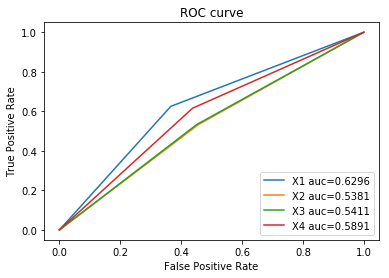

In [86]:
plt.figure()
plt.plot(x1_fpr, x1_tpr, label='X1 auc=%0.4f' %x1_auc)
plt.plot(x2_fpr, x2_tpr, label='X2 auc=%0.4f' %x2_auc)
plt.plot(x3_fpr, x3_tpr, label='X3 auc=%0.4f' %x3_auc)
plt.plot(x4_fpr, x4_tpr, label='X4 auc=%0.4f' %x4_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

The best performer proved to be the X1 design matrix, which utilized word2vec to train a vector representation of the movie reviews, and then used K-Means clustering to featurize the training set. However, it still significantly underperformed the standard bag-of-words model, which achieved an AUC score close to 0.90.

Given more time and resources to perform experiments, I would have experimented with the classifiers in several different ways. The first parameter to alter could be the context size when training the word2vec. In these tests we utilized 5, but a window of such size may not sufficiently capture the themes and tones in an author's movie review. Additionally, it would be interesting to incorporate n-grams into our featurization of the reviews. N-grams could provide insight into commonly used phrases relevant to reviewer sentiment by capturing phrases such as "It was great" or "It was not great", where word order is very relevant.

Another important parameter to test would be the number of clusters in K-Means. For a corpus of 25,000 reviews, 10 clusters may well overlap topics that to a human observer would seem easy to differentiate.
Trying a larger number such as 100 may better capture the nuances of the reviews and lead to better feature vectors. 
   
Another important alteration would be the implementation of a tf-idf filtered corpus. This may help eliminate common words which add no value to the overall sentiment of the review. Examples include the words 'film' and 'movie'. This may also improve the efficacy of the LDA transformations, since the topics would be free from frequently used words of little import. 

### Kaggle submission

We retrain the models with the entire training set and predict on the test set.

In [95]:
k1 = RandomForestClassifier(n_estimators=98).fit(X1, y).predict(X1_test)
k2 = RandomForestClassifier(n_estimators=68).fit(X2, y).predict(X2_test)
k3 = RandomForestClassifier(n_estimators=91).fit(X3, y).predict(X3_test)
k4 = RandomForestClassifier(n_estimators=95).fit(X4, y).predict(X4_test)

In [99]:
output1 = pd.DataFrame(data={"id":test["id"], "sentiment":k1})
output1.to_csv( "k1.csv", index=False, quoting=3 )

output2 = pd.DataFrame(data={"id":test["id"], "sentiment":k2})
output2.to_csv( "k2.csv", index=False, quoting=3 )

output3 = pd.DataFrame(data={"id":test["id"], "sentiment":k3})
output3.to_csv( "k3.csv", index=False, quoting=3 )

output4 = pd.DataFrame(data={"id":test["id"], "sentiment":k4})
output4.to_csv( "k4.csv", index=False, quoting=3 )

The results are submitted to Kaggle to receive a score. The results are underwhelming but expected given our previous experiments. With more time to tune parameters and experiment with the featurization, the accuracy of each matrix would increase. However, it remains impressive the comparative performance that the simple bag-of-words model achieved.

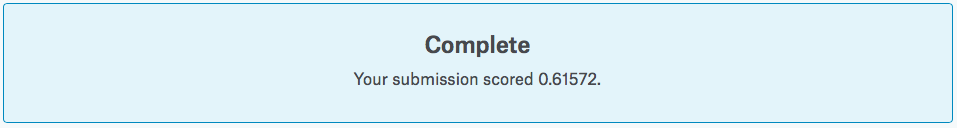

In [104]:
from IPython.display import Image
Image(filename="k1.png")

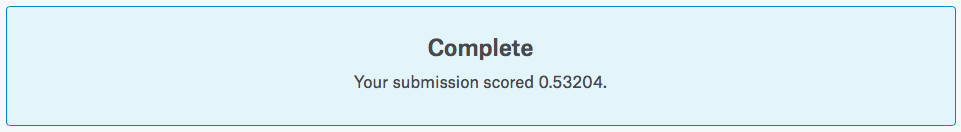

In [101]:
Image(filename="k2.png")

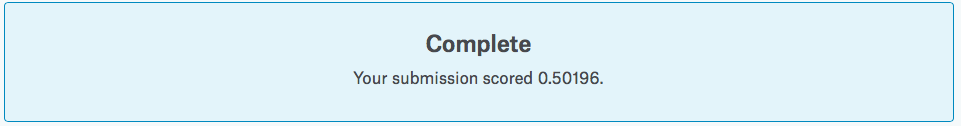

In [102]:
Image(filename="k3.png")

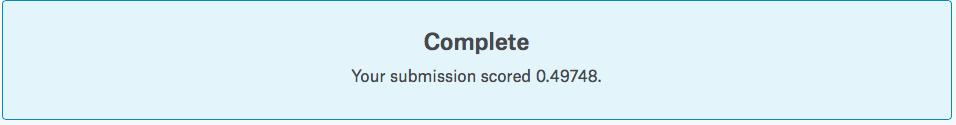

In [103]:
Image(filename="k4.png")